In [ ]:
### Simple Exploratory data analysis (EDA)
# data file: preprocessed_data.pkl
# total tweets distribution
# follower distribution
# following distribution
# user created time distribution
# location distribution
# language distribution
# retweets count distribution
# political stance distribution
# hashtags distribution

In [18]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_pickle("preprocessed_data.pkl")

In [ ]:
# # export non-labeled tweets to take a look

# no_na = df1[df1['tags_splitted']!="NA"]
# # 10594 tweets with no tags

# # check rows rabeled by neither of two groups
# non_R = no_na[no_na['pro_Russian']==False]
# non = non_R[non_R['pro_Ukraine']==False]


# # export dataframe 
# #non.to_csv("sampled_dataset_not_labeled.csv",sep = ",", header = True, encoding = "UTF-8")
# non

# df_U = non[non['text'].str.contains('Rassian fascists')]
# # tried keywords but no results in the sample 

In [ ]:
# no_tag = df1[df1['tags_splitted']=="NA"]
# # 10594 tweets with no hashtags

# # 255 labeled as pro-Russia
# proRussia = df1[df1['pro_Russian']==True]
# proRussiaNoUkraine = df1[(df1['pro_Russian']==True) & (df1['pro_Ukraine']==False)]

# # 6412 labeled as pro-Ukraine
# proUkraine = df1[df1['pro_Ukraine']==True]
# proUkraineNoRussia = df1[(df1['pro_Russian']==False) & (df1['pro_Ukraine']==True)]

# # still a lot rabeled by neither of two groups
# non_R = df1[df1['pro_Russian']==False]
# # non = non_R[non_R['pro_Ukraine']==False]

# non = df1[(df1['pro_Russian']==False) & (df1['pro_Ukraine']==False)]
# both = df1[(df1['pro_Russian']==True) & (df1['pro_Ukraine']==True)]

# display(proRussia.shape)
# display(proUkraine.shape)
# display(non.shape)
# display(both.shape)
# display(proRussiaNoUkraine.shape)
# display(proUkraineNoRussia.shape)


In [ ]:
# node_columns = ["userid","username","usercreatedts","following","followers","totaltweets","pro_Russian","pro_Ukraine"]
# nodesBefore = df1[node_columns][(df1['tweetcreatedts'] < '2022-03-04 24:59:59+00:00')]
# nodesAfter = df1[node_columns][(df1['tweetcreatedts'] > '2022-03-04 24:59:59+00:00')]

# difAll = round(len(nodesAfter) * 100 / len(nodesBefore), 2)
# print("Tweets before Russia's block:", len(nodesBefore), "and after:", len(nodesAfter), "\nDifference:", difAll, len(nodesBefore)-len(nodesAfter))

# proRussianBefore = proRussia[node_columns][(proRussia['tweetcreatedts'] < '2022-03-04 24:59:59+00:00')]
# proRussianAfter = proRussia[node_columns][(proRussia['tweetcreatedts'] > '2022-03-04 24:59:59+00:00')]
# difRus = round(len(proRussianAfter) * 100 / len(proRussianBefore),2)
# print("Pro-Russian tweets before Russia's block:", len(proRussianBefore), "and after:", len(proRussianAfter), "\nDifference:", difRus, len(proRussianBefore)-len(proRussianAfter))

# ratioBefore = round(len(proRussianBefore)/len(nodesBefore), 4)
# ratioAfter = round(len(proRussianAfter)/len(nodesAfter), 4)

# print("Ratio pro-Russian:Total tweets before block:", ratioBefore, "and after:", ratioAfter)


# proUkraineBefore = proUkraine[node_columns][(proUkraine['tweetcreatedts'] < '2022-03-04 24:59:59+00:00')]
# proUkraineAfter = proUkraine[node_columns][(proUkraine['tweetcreatedts'] > '2022-03-04 24:59:59+00:00')]
# difUkr = round(len(proUkraineAfter) * 100 / len(proUkraineBefore),2)
# print("Pro-Ukrainian tweets before Russia's block:", len(proUkraineBefore), "and after:", len(proUkraineAfter), "\nDifference:", difUkr, len(proUkraineBefore)-len(proUkraineAfter))


# bothBefore = both[node_columns][(both['tweetcreatedts'] < '2022-03-04 24:59:59+00:00')]
# bothAfter = both[node_columns][(both['tweetcreatedts'] > '2022-03-04 24:59:59+00:00')]
# difBoth = round(len(bothAfter) * 100 / len(bothBefore),2)
# print("Both tweets before Russia's block:", len(bothBefore), "and after:", len(bothAfter), "\nDifference:", difBoth, len(bothBefore)-len(bothAfter))


# nonBefore = non[node_columns][(non['tweetcreatedts'] < '2022-03-04 24:59:59+00:00')]
# nonAfter = non[node_columns][(non['tweetcreatedts'] > '2022-03-04 24:59:59+00:00')]
# difNon = round(len(nonAfter) * 100 / len(nonBefore),2)
# print("Neutral tweets before Russia's block:", len(nonBefore), "and after:", len(nonAfter), "\nDifference:", difNon, len(nonBefore)-len(nonAfter))

In [20]:
# total tweets distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["totaltweets"]
print(st.mode(x))
print(st.median(x))
print(st.mean(x))
print(x.describe())
max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=200) #doesn't show clearly, need to change
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

1
9769.5
50107.60667087386
count    1.616280e+05
mean     5.010761e+04
std      1.280532e+05
min      0.000000e+00
25%      1.523000e+03
50%      9.769500e+03
75%      4.405700e+04
max      6.967834e+06
Name: totaltweets, dtype: float64
6967834 0


count    1.616280e+05
mean     1.332195e+04
std      2.939765e+05
min      0.000000e+00
25%      5.100000e+01
50%      2.820000e+02
75%      1.237000e+03
max      1.755703e+07
Name: followers, dtype: float64
0
282.0
13321.949606503824
17557028 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

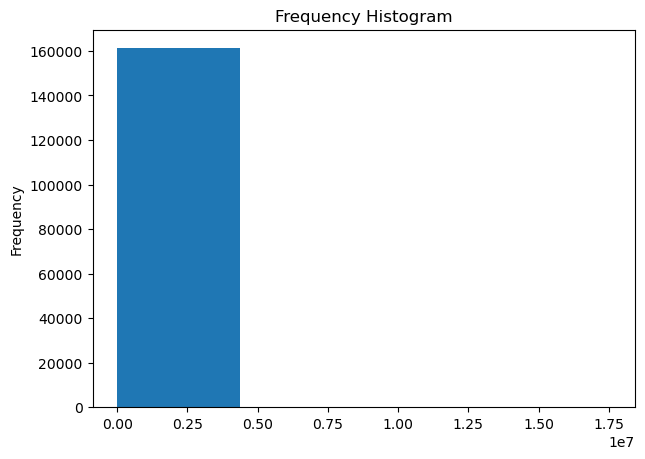

In [22]:
# follower distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["followers"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
plt.hist(x, bins=10)  #doesn't show clearly, need to change
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

count    161628.000000
mean       1800.759701
std        9170.907634
min           0.000000
25%           1.000000
50%          25.000000
75%         301.000000
max      147637.000000
Name: retweetcount, dtype: float64
0
25.0
1800.7597012893805
147637 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

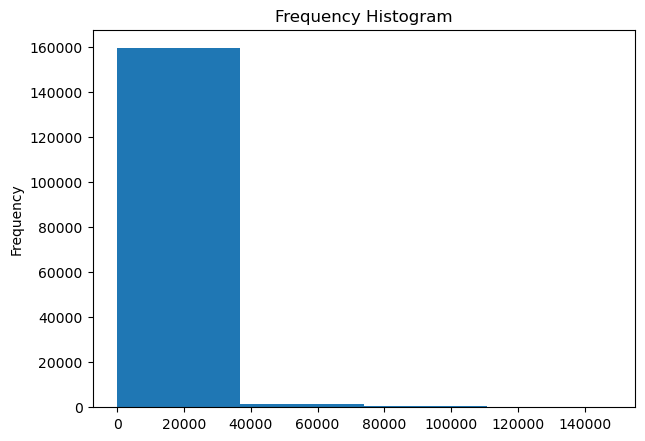

In [24]:
# retweetcount distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["retweetcount"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=10) 
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [30]:
data[data["retweetcount"] == 147637]

,userid,username,textid,location,language,tweetid,tweetcreatedts,retweetcount,hashtags,text,usercreatedts,following,followers,totaltweets,tags_splitted,tags_lower,pro_Russian,pro_Ukraine
115083,296800653,MinooOsborne,85,NaN,en,1501300567582420998,2022-03-08 20:55:22,147637,[],.@ZelenskyyUa's tv address to the Russian (!) ...,2011-05-11 12:34:24,5784,6139,74685,NA,NA,False,False


In [23]:
data.columns

Index(['userid', 'username', 'textid', 'location', 'language', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'hashtags', 'text', 'usercreatedts',
       'following', 'followers', 'totaltweets', 'tags_splitted', 'tags_lower',
       'pro_Russian', 'pro_Ukraine'],
      dtype='object')